## Import Libraries

In [45]:
import pandas as pd
import plotly.express as px

## Load Data

In [47]:
# Import Gapminder Data
gapminder_df = pd.read_csv("gapminder_data.csv")
gapminder_df.head(10)

,Country,Year,Population,Life Expectancy,GDPpcap,CO2 Emissions,Child Mortality,Avg Income,Fertility Rate,Region,Longitude,Latitude,8 Regions
0,Afghanistan,1800,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
1,Afghanistan,1801,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
2,Afghanistan,1802,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
3,Afghanistan,1803,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
4,Afghanistan,1804,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
5,Afghanistan,1805,3280000.0,28.2,481.0,NaN,469.0,1.33,7.0,Asia,66.0,33.0,asia_west
6,Afghanistan,1806,3280000.0,28.1,481.0,NaN,470.0,1.33,7.0,Asia,66.0,33.0,asia_west
7,Afghanistan,1807,3280000.0,28.1,481.0,NaN,470.0,1.33,7.0,Asia,66.0,33.0,asia_west
8,Afghanistan,1808,3280000.0,28.1,481.0,NaN,470.0,1.33,7.0,Asia,66.0,33.0,asia_west
9,Afghanistan,1809,3280000.0,28.1,481.0,NaN,470.0,1.33,7.0,Asia,66.0,33.0,asia_west


## Filter Data

In [49]:
gapminder_df.query('Year >= 1990 & Year <= 2020 & Country == "China"').head(10)


,Country,Year,Population,Life Expectancy,GDPpcap,CO2 Emissions,Child Mortality,Avg Income,Fertility Rate,Region,Longitude,Latitude,8 Regions
10725,China,1990,1.150000e+09,68.1,1830.0,NaN,53.7,1.90,2.51,Asia,105.0,35.0,east_asia_pacific
10726,China,1991,1.170000e+09,68.4,1920.0,NaN,53.2,2.00,1.93,Asia,105.0,35.0,east_asia_pacific
10727,China,1992,1.180000e+09,68.7,2100.0,NaN,52.2,2.10,1.78,Asia,105.0,35.0,east_asia_pacific
10728,China,1993,1.200000e+09,69.0,2320.0,NaN,50.8,2.21,1.69,Asia,105.0,35.0,east_asia_pacific
10729,China,1994,1.210000e+09,69.4,2540.0,NaN,49.2,2.39,1.63,Asia,105.0,35.0,east_asia_pacific
10730,China,1995,1.220000e+09,69.8,2750.0,NaN,47.4,2.59,1.59,Asia,105.0,35.0,east_asia_pacific
10731,China,1996,1.230000e+09,70.1,2940.0,NaN,45.5,2.80,1.55,Asia,105.0,35.0,east_asia_pacific
10732,China,1997,1.240000e+09,70.5,3120.0,NaN,43.5,2.89,1.53,Asia,105.0,35.0,east_asia_pacific
10733,China,1998,1.250000e+09,70.9,3270.0,NaN,41.5,2.99,1.52,Asia,105.0,35.0,east_asia_pacific
10734,China,1999,1.260000e+09,71.2,3450.0,NaN,39.2,3.08,1.53,Asia,105.0,35.0,east_asia_pacific


## Plot World Poster

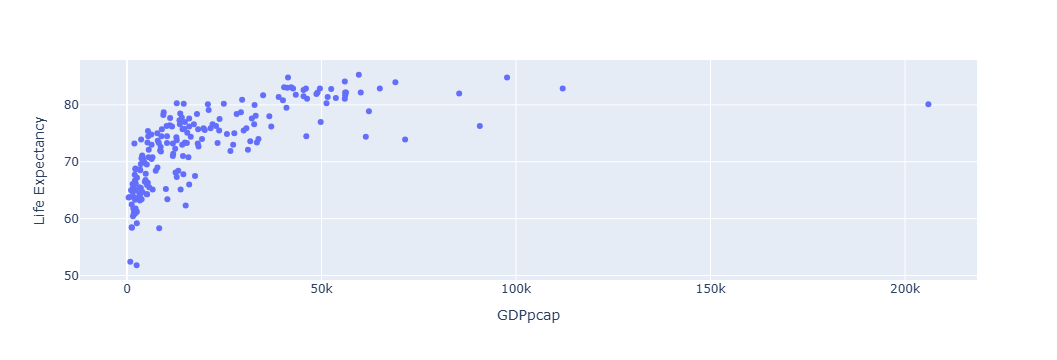

In [51]:
gwp_2019 = gapminder_df.query('Year == 2019' )

fig = px.scatter(
    gwp_2019,
    x='GDPpcap',
    y='Life Expectancy'
   )

fig.show()

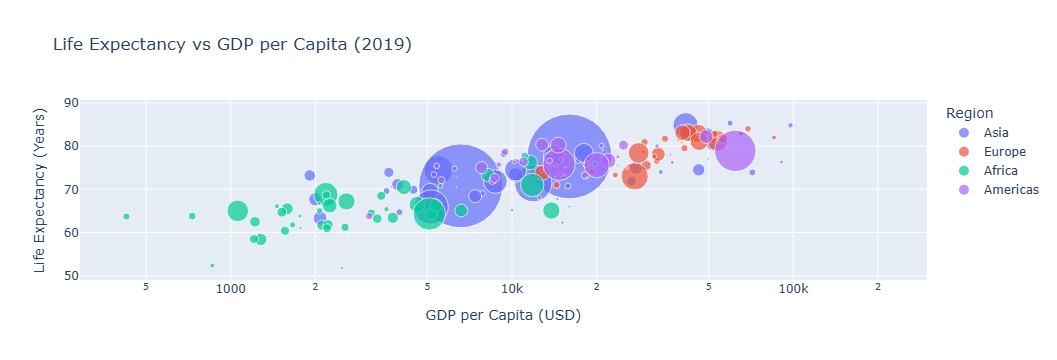

In [52]:
fig = px.scatter(
    gwp_2019,
    x='GDPpcap',
    y='Life Expectancy',
    size='Population',
    color='Region',
    log_x=True,
    size_max = 60,
    hover_name = "Country",
    title='Life Expectancy vs GDP per Capita (2019)',
    labels={
        'GDPpcap': 'GDP per Capita (USD)',
        'Life Expectancy': 'Life Expectancy (Years)'
    }
    )
    
fig.show()

## Line plot of GDP Trends

Recreate this [line plot](https://www.gapminder.org/tools/#$chart-type=linechart&url=v2)

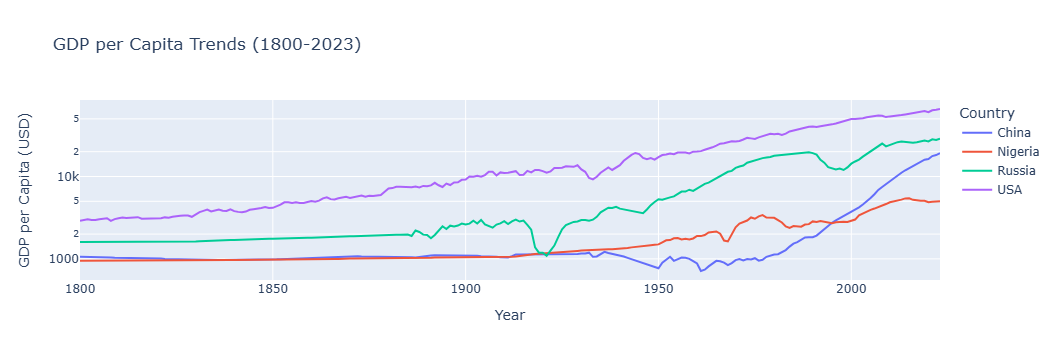

In [54]:
gdp_trend = gapminder_df.query( "Year >= 1800 & Year <= 2023 & " \
"Country in ['China', 'USA', 'Russia', 'Nigeria' ] " ) 

fig = px.line(
    gdp_trend,
    x="Year",
    y="GDPpcap",
    color="Country",
    log_y=True,
    hover_name = 'Country',
    title="GDP per Capita Trends (1800-2023)",
    labels={"Year": "Year", "GDPpcap": "GDP per Capita (USD)"},
)
fig.show()


## Bar chart of population size (top 10)

Recreate this [bar chart](https://www.gapminder.org/tools/#$chart-type=barrank&url=v2)

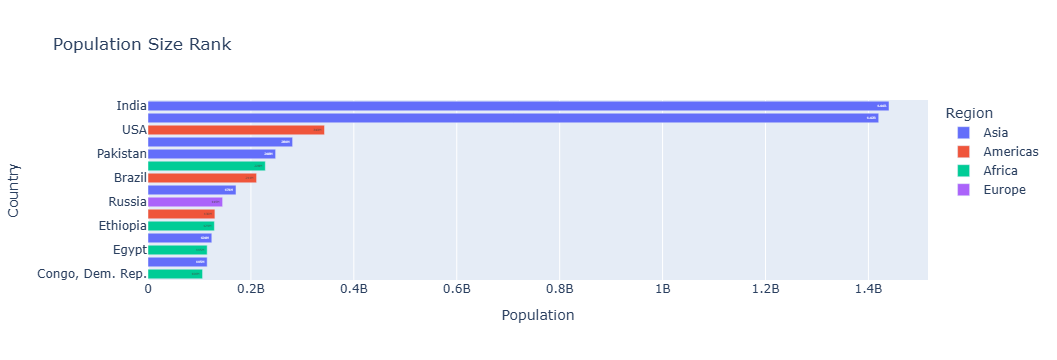

In [56]:
pop_rank = gapminder_df.query('Year == 2023') \
    .sort_values(by='Population', ascending=False).head(15)

fig = px.bar(
    pop_rank,
    x='Population',
    y='Country',
    orientation='h',
    title='Population Size Rank',
    color='Region',  
    text_auto = True,
    hover_name = 'Country'
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'}) # base plotly to change figure

fig.show()

## World Map with Population bubbles

Recreate this [map](https://www.gapminder.org/tools/#$chart-type=map&url=v2)

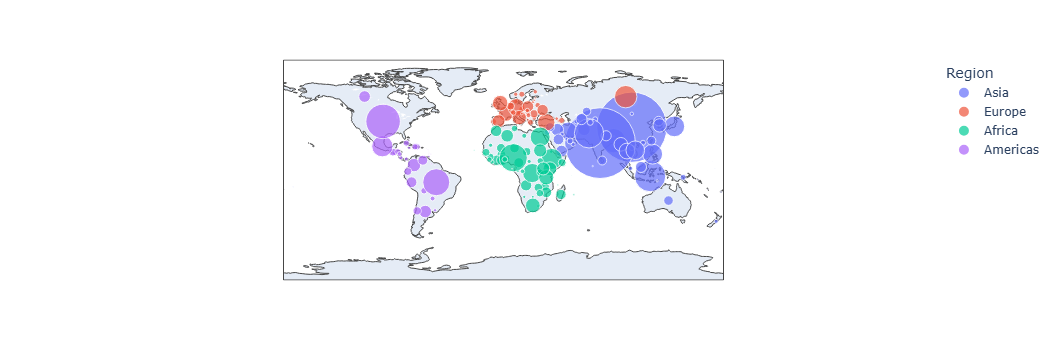

In [58]:
map_df = gapminder_df.query('Year == 2023')

fig = px.scatter_geo(
    map_df,
    lat = 'Latitude',         # Column for latitude coordinates
    lon = 'Longitude',        # Column for longitude coordinates   
    size='Population',           
    color='Region',              
    size_max = 50,
    hover_name='Country',
    scope='world',               
)
fig.show()